In [1]:
import seaborn

from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import *

sc = SparkContext("local", "DisplayRepurposingDrugsDB")

## Load from repurposing parquet database

In [2]:
sqlContext = SQLContext(sc)
df = sqlContext.read.parquet('./small_compounds/compiled/output')

## Schema

```
message spark_schema {
  optional binary zinc_id (UTF8);
  optional int32 num_atoms;
  optional int32 num_bonds;
  optional double molecular_weight;
  optional int32 net_charge;
  optional group protomer_ids (LIST) {
    repeated group list {
      required binary element (UTF8);
    }
  }
  optional group ph_levels (LIST) {
    repeated group list {
      required binary element (UTF8);
    }
  }
  optional double logp;
  optional int32 rotatable_bonds;
  optional double apolar_desolvation;
  optional double polar_desolvation;
  optional int32 hbond_acceptors;
  optional int32 hbond_donors;
  optional group pdbqts (LIST) {
    repeated group list {
      required binary element (UTF8);
    }
  }
}
```

In [3]:
df.describe()

DataFrame[summary: string, zinc_id: string, num_atoms: string, num_bonds: string, molecular_weight: string, net_charge: string, logp: string, rotatable_bonds: string, apolar_desolvation: string, polar_desolvation: string, hbond_acceptors: string, hbond_donors: string]

In [4]:
df.selectExpr("*").limit(10).toPandas()

,zinc_id,num_atoms,num_bonds,molecular_weight,net_charge,protomer_ids,ph_levels,logp,rotatable_bonds,apolar_desolvation,polar_desolvation,hbond_acceptors,hbond_donors,pdbqts
0,ZINC000043194077,57,61,587.90,0,[554297755],[REF],7.372,6,15.01,-16.34,0,6,[REMARK Name = ZINC000043194077\nREMARK 8 ac...
1,ZINC000100043983,21,22,195.16,-1,[169029113],[MID],-1.746,0,-0.78,-41.46,1,5,[]
2,ZINC000000156836,31,31,180.27,1,[168050627],[REF],1.846,4,5.60,-30.13,1,1,[REMARK Name = ZINC000000156836\nREMARK 7 ac...
3,ZINC000001540245,77,78,500.71,-1,[551683990],[LOW],7.286,10,14.33,-56.92,0,4,[]
4,ZINC000005821094,54,57,330.46,0,[257701806],[REF],4.947,4,9.14,-6.41,1,3,[REMARK Name = ZINC000005821094\nREMARK 9 ac...
5,ZINC000100029945,70,76,527.60,0,[554184585],[REF],5.211,6,10.97,-13.02,1,5,[REMARK Name = ZINC000100029945\nREMARK 7 ac...
6,ZINC000002525885,45,46,264.38,1,[393454204],[REF],2.733,4,5.27,-36.12,3,2,[REMARK Name = ZINC000002525885\nREMARK 8 ac...
7,ZINC000000002071,31,32,230.26,0,[178149163],[REF],2.852,2,6.63,-8.25,1,3,[REMARK Name = ZINC000000002071\nREMARK 4 ac...
8,ZINC000005127810,11,11,127.14,0,[],[],NaN,0,0.00,0.00,0,0,[REMARK Name = ZINC000005127810\nREMARK 0 ac...
9,ZINC000030691754,55,57,452.91,1,[524632038],[REF],4.135,6,8.64,-39.27,3,4,[]


In [5]:
df.selectExpr("*").count()

10445

In [6]:
df.selectExpr("*").filter(size("pdbqts") > 0).count()

9048

In [7]:
df.selectExpr("*").filter(size("pdbqts") > 0).filter(size("protomer_ids") == 1).count()

6990

In [8]:
df.selectExpr("*").filter(size("pdbqts") > 0).filter(size("protomer_ids") > 1).limit(10).toPandas()

,zinc_id,num_atoms,num_bonds,molecular_weight,net_charge,protomer_ids,ph_levels,logp,rotatable_bonds,apolar_desolvation,polar_desolvation,hbond_acceptors,hbond_donors,pdbqts
0,ZINC000019685790,87,90,612.74,1,"[553615353, 553615348]","[MID, REF]",6.478,12,20.92,-44.25,2,7,[REMARK Name = ZINC000019685790\nREMARK 20 a...
1,ZINC000030691548,69,73,501.55,1,"[553855074, 553855078]","[MID, MID]",3.643,8,8.55,-44.89,2,9,[REMARK Name = ZINC000030691548\nREMARK 14 a...
2,ZINC000001494627,54,56,380.46,1,"[209330938, 209330945]","[REF, MID]",2.724,9,6.58,-53.81,5,3,[REMARK Name = ZINC000001494627\nREMARK 11 a...
3,ZINC000100369621,50,54,343.42,0,"[219097405, 219097407]","[REF, MID]",2.656,5,8.10,-9.70,1,4,[REMARK Name = ZINC000100369621\nREMARK 7 ac...
4,ZINC000059817101,78,82,545.62,0,"[554430953, 554430957]","[REF, MID]",2.666,9,9.25,-85.42,3,9,[REMARK Name = ZINC000059817101\nREMARK 16 a...
5,ZINC000049089868,32,34,370.81,-1,"[205169002, 205168998]","[MID, REF]",2.453,2,2.49,-37.80,1,7,[REMARK Name = ZINC000049089868\nREMARK 2 ac...
6,ZINC000028257314,105,109,703.91,0,"[561911615, 561911617]","[REF, MID]",6.289,18,17.38,-18.84,5,5,[REMARK Name = ZINC000028257314\nREMARK 23 a...
7,ZINC000019701765,32,35,218.27,1,"[342953973, 342953969]","[MID, REF]",1.405,0,7.45,-44.18,1,2,[REMARK Name = ZINC000019701765\nREMARK 0 ac...
8,ZINC000022454221,88,90,605.70,1,"[553742700, 553742696]","[MID, REF]",3.540,16,11.97,-56.28,1,11,[REMARK Name = ZINC000022454221\nREMARK 24 a...
9,ZINC000003995327,51,55,345.46,1,"[210096783, 210096786]","[REF, MID]",3.929,1,6.51,-7.30,2,2,[REMARK Name = ZINC000003995327\nREMARK 3 ac...


In [9]:
pandas_df = df.selectExpr("molecular_weight", "logp").filter(size("pdbqts") > 0).toPandas()

In [10]:
pandas_df

,molecular_weight,logp
0,587.90,7.372
1,180.27,1.846
2,330.46,4.947
3,527.60,5.211
4,264.38,2.733
...,...,...
9043,302.34,2.368
9044,288.15,3.590
9045,137.11,1.090
9046,260.35,2.783


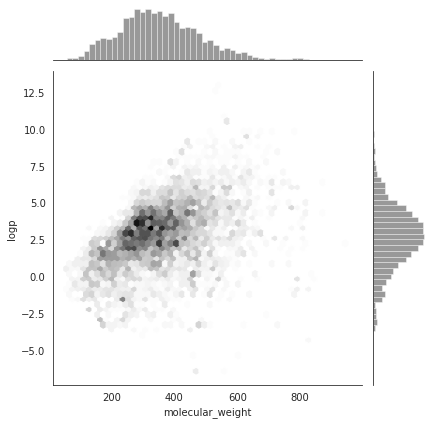

In [11]:
with seaborn.axes_style("white"):
    seaborn.jointplot(x="molecular_weight", y="logp", data=pandas_df, kind="hex", color="k");